# Regressão Linear

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel(r"C:\Users\gilso\Documents\FACULDADE\Eng de Software\1° ano\PROJETOS\SIJIA\challenger-SijiA\SPRINT_MATEMÁTICA\dados_geral.xlsx")
df

,Quiz,Acertos,Erros,Acertos(%),Média tempo resposta(s),Duração do quiz(min),Status
0,Exame - Hemograma,2,8,20,31.6,5.266667,REPROVADO
1,Exame - Hemograma,3,7,30,24.5,4.083333,REPROVADO
2,Exame - Hemograma,1,9,10,27.2,4.533333,REPROVADO
3,Exame - Hemograma,1,9,10,30.7,5.116667,REPROVADO
4,Exame - Hemograma,6,4,60,28.9,4.816667,REPROVADO
...,...,...,...,...,...,...,...
395,Exame - Hemograma,9,1,90,20.6,3.433333,REPROVADO
396,Exame - Hemograma,8,2,80,24.2,4.033333,REPROVADO
397,Exame - Hemograma,7,3,70,22.8,3.800000,REPROVADO
398,Exame - Hemograma,9,1,90,24.1,4.016667,REPROVADO


In [49]:
df.shape

(400, 7)

In [50]:
df.dtypes

Quiz                        object
Acertos                      int64
Erros                        int64
Acertos(%)                   int64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

In [51]:
df = df.astype({"Acertos(%)": float})
df = df.astype({"Acertos": float})
df = df.astype({"Erros": float})

In [52]:
df.dtypes

Quiz                        object
Acertos                    float64
Erros                      float64
Acertos(%)                 float64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

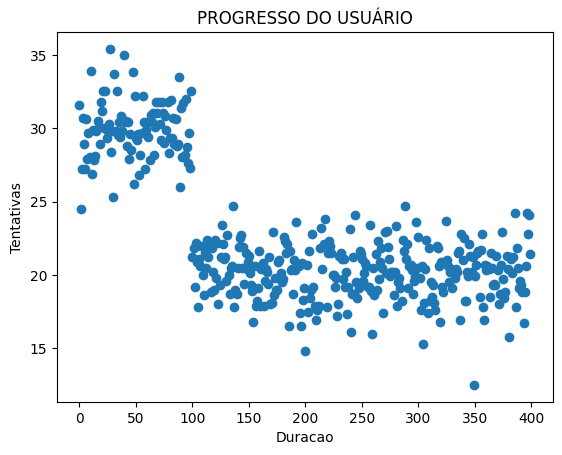

In [53]:
tentativas = range(len(df))
acertos = df['Acertos']
duracao = df['Média tempo resposta(s)']

plt.scatter(tentativas, duracao)
plt.title('PROGRESSO DO USUÁRIO')
plt.xlabel('Duracao')
plt.ylabel('Tentativas')
plt.show()

In [54]:
pip install statsmodels

In [55]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [56]:
# Criação do modelo
#               eixo    y            x
regressao = smf.ols('tentativas ~ duracao', data = df).fit()

In [57]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             tentativas   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     367.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.72e-58
Time:                        11:36:30   Log-Likelihood:                -2336.4
No. Observations:                 400   AIC:                             4677.
Df Residuals:                     398   BIC:                             4685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    592.3660     20.915     28.322      0.0

In [58]:
regressao.params

Intercept    592.366025
duracao      -17.374803
dtype: float64

C:\Users\gilso\AppData\Local\Temp\ipykernel_48476\308707118.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


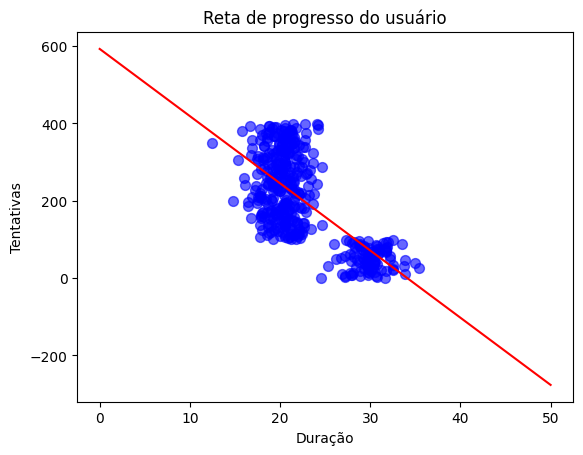

In [59]:
plt.scatter(y=tentativas, x=duracao, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 50)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de progresso do usuário')
plt.ylabel('Tentativas')
plt.xlabel('Duração')
plt.show()

# Regressão Polinomial

In [60]:
modelo2 = np.poly1d(np.polyfit(duracao, tentativas, 2))

In [61]:
y2 = modelo2(duracao)
y2

array([ 30.58069431, 181.12840091, 130.62292279,  52.83233981,
        94.57628882, 130.62292279,  55.24796828, 116.17762725,
        76.47763527, 114.06859233, -30.46337857, 136.64343399,
        71.83941871, 118.27530685, 111.9482021 ,  74.16420465,
        57.65224143,  67.15578088,  94.57628882,  25.51097571,
        40.5838677 ,   7.40926814,  69.50327746,   7.40926814,
        85.61780458,  74.16420465,  62.42672179, -73.51099574,
       105.51889949,  74.16420465, 167.02681888, -24.91673666,
        74.16420465,   7.40926814,  81.07043056,  60.04515927,
        83.34979522,  50.40535602,  74.16420465, -61.78181419,
        60.04515927,  57.65224143,  96.78752159,  60.04515927,
       116.17762725,  78.77971057, 103.35308799, -27.68437996,
       150.29385736,  15.23527472,  85.61780458,  87.87445861,
        78.77971057, 138.62756042, 109.81645655,  76.47763527,
        15.23527472,  60.04515927, 130.62292279,  71.83941871,
        60.04515927,  83.34979522, 118.27530685,  47.96

In [62]:
modelo2.coef

array([ -0.56776584,  10.64776138, 261.05969355])

In [63]:
print("Equação: tentativa = {:.1f}*acertos^2 + {:.1f}*acertos + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: tentativa = -0.6*acertos^2 + 10.6*acertos + 261.1


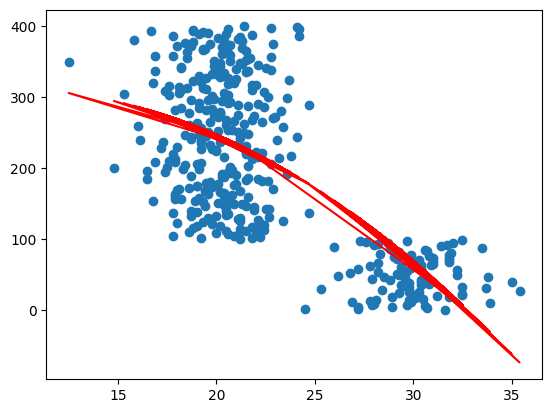

: 

In [64]:
plt.scatter(duracao, tentativas)
plt.plot(duracao,y2,color='red')